```conda install numpy  
conda install pandas  
conda install matplotlib
conda install seaborn
conda install scikit-learn
conda install tensorflow
conda install keras
conda install tabulate
conda install pymysql
conda install sqlalchemy
conda install pydotplus
conda install ipympl
conda install opencv --channel conda-forge
conda install pillow --channel anaconda
conda install pandas_profiling --channel conda-forge``````

<AxesSubplot: xlabel='Perímetro medio', ylabel='¿Benigno?'>

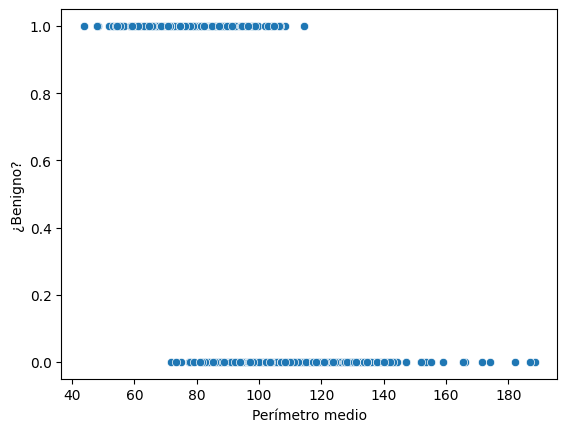

In [1]:
#Ejercicio 2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer

df=pd.DataFrame({
    'Perímetro medio':load_breast_cancer().data[:,2],
    '¿Benigno?':load_breast_cancer().target,
})
 
figure=plt.figure()
axes = figure.add_subplot()
sns.scatterplot(data=df,x="Perímetro medio",y="¿Benigno?")

In [2]:
#Ejercicio 3
a=True
b=False
c="4"
d=int(c)
e=3
f=float(e)
g=6
h=str(g)
i=5.6
j=float(i)
print(j)

5.6


In [3]:
#Ejercicio 4.A
load_breast_cancer?

Signature: load_breast_cancer(*, return_X_y=False, as_frame=False)
Docstring:
Load and return the breast cancer wisconsin dataset (classification).

The breast cancer dataset is a classic and very easy binary classification
dataset.

=================   ==============
Classes                          2
Samples per class    212(M),357(B)
Samples total                  569
Dimensionality                  30
Features            real, positive
=================   ==============

The copy of UCI ML Breast Cancer Wisconsin (Diagnostic) dataset is
downloaded from:
https://goo.gl/U2Uwz2

Read more in the :ref:`User Guide <breast_cancer_dataset>`.

Parameters
----------
return_X_y : bool, default=False
    If True, returns ``(data, target)`` instead of a Bunch object.
    See below for more information about the `data` and `target` object.

    .. versionadded:: 0.18

as_frame : bool, default=False
    If True, the data is a pandas DataFrame including columns with
    appropriate dtypes (numeri

In [4]:
#Ejercicio 4.B
help(load_breast_cancer)

Help on function load_breast_cancer in module sklearn.datasets._base:

load_breast_cancer(*, return_X_y=False, as_frame=False)
    Load and return the breast cancer wisconsin dataset (classification).
    
    The breast cancer dataset is a classic and very easy binary classification
    dataset.
    
    =================   ==============
    Classes                          2
    Samples per class    212(M),357(B)
    Samples total                  569
    Dimensionality                  30
    Features            real, positive
    =================   ==============
    
    The copy of UCI ML Breast Cancer Wisconsin (Diagnostic) dataset is
    downloaded from:
    https://goo.gl/U2Uwz2
    
    Read more in the :ref:`User Guide <breast_cancer_dataset>`.
    
    Parameters
    ----------
    return_X_y : bool, default=False
        If True, returns ``(data, target)`` instead of a Bunch object.
        See below for more information about the `data` and `target` object.
    
       

In [5]:
#Ejercicio 4.C

datos=load_breast_cancer()

dir(datos)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [6]:
#Ejercicio 5
print(5/3)
print(5//3)
print(2**16)

1.6666666666666667
1
65536


In [7]:
#Ejercicio 6
a=[2, 3, 5, 7, 11, 13, 17, 19, 23, 29]
print(a[3])
print(len(a))
print(sum(a))
a.append(97)
print(a)
b=(2, 3, 5, 7, 11, 13, 17, 19, 23, 29)
print(b[3])
##Da un error
##b.append(97) 

7
10
129
[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 97]
7


In [8]:
a=[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97]

for primo in a:
    print(primo)

print()
print("-------")


for primo in a:
    print(primo,end=";")

print()
print("-------")

for primo in a:
    print(primo,end=" ")

print()
print("-------")


for index,primo in enumerate(a):
    if (index % 2)==1:
        print(primo)
    else:
        print(primo,end=",")

print()
print("-------")


for index,primo in enumerate(a):
    if (index % 3)==2:
        print(primo)
    else:
        print(primo,end=" ")

2
3
5
7
11
13
17
19
23
29
31
37
41
43
47
53
59
61
67
71
73
79
83
89
97

-------
2;3;5;7;11;13;17;19;23;29;31;37;41;43;47;53;59;61;67;71;73;79;83;89;97;
-------
2 3 5 7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89 97 
-------
2,3
5,7
11,13
17,19
23,29
31,37
41,43
47,53
59,61
67,71
73,79
83,89
97,
-------
2 3 5
7 11 13
17 19 23
29 31 37
41 43 47
53 59 61
67 71 73
79 83 89
97 

In [9]:
#Ejercicio 8
from tabulate import tabulate

a=[[1,0,0,0],[0,1,7,0],[0,0,1,0],[0,0,0,1]]
print(a[1][2])
b=a[2]

c=[a[0][1],a[1][1],a[2][1],a[3][1]]
print(c)
c=[x[1] for x in a]
print(c)
c=[[a[0][1]],[a[1][1]],[a[2][1]],[a[3][1]]]
print(c)

print(tabulate(a, headers=["A", "B", "C","D"]))

7
[0, 1, 0, 0]
[0, 1, 0, 0]
[[0], [1], [0], [0]]
  A    B    C    D
---  ---  ---  ---
  1    0    0    0
  0    1    7    0
  0    0    1    0
  0    0    0    1


In [10]:
#Ejercicio 9
cliente={
    "nombre": "Juan",
    "apellidos": "Pérez García",
    "telefono":{ 
        "movil": "654789658",
        "fijo": "963789654"
    },
    "direccion":{
        "tipo_via": "calle",
        "numero": 45,
        "puerta": 7
    },   
    "numero_facturas":{
        "compras": ["234/2020", "345/2021", "675/2021", "561/2022"],
        "ventas":  ["456/2020", "564/2021", "768/2021", "345/2022"]    
    }
}

print(cliente['nombre'])
print(cliente['telefono']['movil'])
print(cliente['direccion']['tipo_via'])
print(cliente['numero_facturas']['ventas'][2])
print(len(cliente['numero_facturas']['compras']))

for key_name in cliente.keys():
    print(key_name)

Juan
654789658
calle
768/2021
4
nombre
apellidos
telefono
direccion
numero_facturas


In [11]:
#Ejercicio 10
if (len(cliente['numero_facturas']['compras'])>5):
    print("Cliente Importante")
else:
    print("Cliente normal")

if (len(cliente['numero_facturas']['compras'])>5):
    print("Cliente Importante")
elif 2<=len(cliente['numero_facturas']['compras'])<5:
    print("Cliente normal")
else:
    print("Cliente poco importante")

for i in range(0,1000):
    print(i,end=",")
print()

for i in range(0,1000):
    print(i+1,end=",")
print()

primos=[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97]
for primo in primos:
    print(primo,end=",")
print()

for posicion,primo in enumerate(primos):
    print(posicion,"->",primo)
print()
print("-------")

for posicion,primo in enumerate(primos):
    if (posicion==0):
        print("Primero->",primo)
    elif (posicion==len(primos)-1):
        print("Último->",primo)
    else:
        print(posicion,"->",primo)

Cliente normal
Cliente normal
0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,

In [12]:
#Ejercicio 11
def importe_final(precio, descuento):
    return precio-(precio*descuento/100)

print(importe_final(120,10))
print(importe_final(descuento=10,precio=120))

def importe_final(precio, descuento=10):
    return precio-(precio*descuento/100)

print(importe_final(120))

108.0
108.0
108.0


In [13]:
# Ejercicio 12

import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from sklearn.datasets import load_iris
from matplotlib.colors import LightSource
import random
 
iris=load_iris()
 
sepal_length=iris.data[0:99,0]
petal_length=iris.data[0:99,2]
flower_type=iris.target[0:99]
 
x=np.column_stack((sepal_length,petal_length))
y=flower_type
 
 
np.random.seed(5)
tf.random.set_seed(5)
random.seed(5)  

capas=[6,12,6,1]


model=Sequential()
for index,neuronas_capa in enumerate(capas):
    if (index==0):
        model.add(Dense(neuronas_capa, activation='relu',input_dim=2))
    elif (index==len(capas)-1):
        model.add(Dense(neuronas_capa, activation='sigmoid'))
    else:
        model.add(Dense(neuronas_capa, activation='relu'))

model.compile(loss='mean_squared_error')
 
 
model.fit(x, y,epochs=40,verbose=False) 
 
 
print(model.predict([[4.9,1.4]]))
print(model.predict([[6.3,4.9]]))

2023-10-23 20:14:03.642038: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-10-23 20:14:03.642058: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-10-23 20:14:04.556147: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-10-23 20:14:04.556163: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2023-10-23 20:14:04.556176: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (beren): /proc/driver/nvidia/version does not exist
2023-10-23 20:14:04.556328: I tensorflow/core/platform/cpu_feature_guar

[[0.0609442]]
[[0.9634158]]


In [14]:
# Ejercicio 13

import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from sklearn.datasets import load_iris
from matplotlib.colors import LightSource
 

def get_datos():
    iris=load_iris()
    
    sepal_length=iris.data[0:99,0]
    petal_length=iris.data[0:99,2]
    flower_type=iris.target[0:99]
    
    x=np.column_stack((sepal_length,petal_length))
    y=flower_type

    return x,y
 
 

 
def compile_fit(capas,x,y):
    np.random.seed(5)
    tf.random.set_seed(5)
    random.seed(5)  
    
    model=Sequential()
    for index,neuronas_capa in enumerate(capas):
        if (index==0):
            model.add(Dense(neuronas_capa, activation='relu',input_dim=2))
        elif (index==len(capas)-1):
            model.add(Dense(neuronas_capa, activation='sigmoid'))
        else:
            model.add(Dense(neuronas_capa, activation='relu'))
    model.compile(loss='mean_squared_error')
    
    model.fit(x, y,epochs=40,verbose=False) 

    return model
 

x,y=get_datos()

capas_red1=[6,12,6,1]
model1=compile_fit(capas_red1,x,y)
print(model1.predict([[4.9,1.4]]))
print(model1.predict([[6.3,4.9]]))
 
capas_red2=[8,16,8,1]
model2=compile_fit(capas_red2,x,y)
print(model2.predict([[4.9,1.4]]))
print(model2.predict([[6.3,4.9]]))

[[0.0609442]]
[[0.9634158]]
[[0.2128706]]
[[0.7334141]]


In [15]:
#Ejercicio 14

import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from sklearn.datasets import load_iris
from matplotlib.colors import LightSource
from tabulate import tabulate


def get_datos():
    iris=load_iris()
    
    sepal_length=iris.data[0:99,0]
    petal_length=iris.data[0:99,2]
    flower_type=iris.target[0:99]
    
    x=np.column_stack((sepal_length,petal_length))
    y=flower_type

    return x,y
 
 

 
def compile_fit(capas,x,y):

    np.random.seed(5)
    tf.random.set_seed(5)
    random.seed(5)  

    model=Sequential()
    for index,neuronas_capa in enumerate(capas):
        if (index==0):
            model.add(Dense(neuronas_capa, activation='relu',input_dim=2))
        elif (index==len(capas)-1):
            model.add(Dense(neuronas_capa, activation='sigmoid'))
        else:
            model.add(Dense(neuronas_capa, activation='relu'))

    model.compile(loss='mean_squared_error')
    
    
    model.fit(x, y,epochs=40,verbose=False) 

    return model
 


x,y=get_datos()
redes=[  [2,  4 , 1], 
         [4,  8, 8, 2, 1], 
         [8, 12, 24, 12, 1],
         [8, 16, 8, 1],
         [16, 32, 1]  ]

resultados=[]
for index,capas in enumerate(redes):
    model=compile_fit(capas,x,y)
    resultado1=model.predict([[4.9,1.4]])
    resultado2=model.predict([[6.3,4.9]])
    resultados.append([index,resultado1,resultado2])


print(tabulate(resultados, headers=["Red", "Result 1", "Result 2"]))

 


  Red    Result 1    Result 2
-----  ----------  ----------
    0    0.514202    0.514202
    1    0.502808    0.502808
    2    0.117824    0.866445
    3    0.212871    0.733414
    4    0.138636    0.923873


In [16]:
#Ejercicio 15

import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from sklearn.datasets import load_iris
from matplotlib.colors import LightSource
from tabulate import tabulate
from time import perf_counter

def get_datos():
    iris=load_iris()
    
    sepal_length=iris.data[0:99,0]
    petal_length=iris.data[0:99,2]
    flower_type=iris.target[0:99]
    
    x=np.column_stack((sepal_length,petal_length))
    y=flower_type

    return x,y
 
 

 
def compile_fit(capas,x,y):

    np.random.seed(5)
    tf.random.set_seed(5)
    random.seed(5)  

    model=Sequential()
    for index,neuronas_capa in enumerate(capas):
        if (index==0):
            model.add(Dense(neuronas_capa, activation='relu',input_dim=2))
        elif (index==len(capas)-1):
            model.add(Dense(neuronas_capa, activation='sigmoid'))
        else:
            model.add(Dense(neuronas_capa, activation='relu'))

    model.compile(loss='mean_squared_error')
    
    tiempo = perf_counter()
    model.fit(x, y,epochs=40,verbose=False) 
    tiempo=perf_counter()-tiempo

    return model,tiempo
 


x,y=get_datos()
redes=[  [2,  4 , 1], 
         [4,  8, 8, 2, 1], 
         [8, 12, 24, 12, 1],
         [8, 16, 8, 1],
         [16, 32, 1]  ]

resultados=[]
for index,capas in enumerate(redes):
    model,tiempo=compile_fit(capas,x,y)
    resultado1=model.predict([[4.9,1.4]])
    resultado2=model.predict([[6.3,4.9]])

    resultados.append([index,resultado1,resultado2,round(tiempo,2)])


print(tabulate(resultados, headers=["Red", "Result 1", "Result 2","Tiempo (s)"]))

  Red    Result 1    Result 2    Tiempo (s)
-----  ----------  ----------  ------------
    0    0.514202    0.514202          0.3
    1    0.502808    0.502808          0.37
    2    0.117824    0.866445          0.38
    3    0.212871    0.733414          0.53
    4    0.138636    0.923873          0.29


In [17]:
#Ejercicio 16



import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from sklearn.datasets import load_iris
from matplotlib.colors import LightSource
from tabulate import tabulate
from time import perf_counter

def get_datos():
    iris=load_iris()
    
    sepal_length=iris.data[0:99,0]
    petal_length=iris.data[0:99,2]
    flower_type=iris.target[0:99]
    
    x=np.column_stack((sepal_length,petal_length))
    y=flower_type

    return x,y
 
 

 
def compile_fit(capas,x,y):

    np.random.seed(5)
    tf.random.set_seed(5)
    random.seed(5)  

    model=Sequential()
    for index,neuronas_capa in enumerate(capas):
        if (index==0):
            model.add(Dense(neuronas_capa, activation='relu',input_dim=2))
        elif (index==len(capas)-1):
            model.add(Dense(neuronas_capa, activation='sigmoid'))
        else:
            model.add(Dense(neuronas_capa, activation='relu'))

    model.compile(loss='mean_squared_error')
    
    tiempo = perf_counter()
    model.fit(x, y,epochs=40,verbose=False) 
    tiempo=perf_counter()-tiempo

    return model,tiempo
 

def array_to_str(datos):
    s=""
    for index,dato in enumerate(datos):
        if (index==0):
            s=s+str(dato)
        else:
            s=s+","+str(dato)

    return s

x,y=get_datos()
redes=[  [2,  4 , 1], 
         [4,  8, 8, 2, 1], 
         [8, 12, 24, 12, 1],
         [8, 16, 8, 1],
         [16, 32, 1]  ]

resultados=[]
for index,capas in enumerate(redes):
    model,tiempo=compile_fit(capas,x,y)
    resultado1=model.predict([[4.9,1.4]])
    resultado2=model.predict([[6.3,4.9]])

    resultados.append([array_to_str(capas),resultado1,resultado2,round(tiempo,2)])


print(tabulate(resultados, headers=["Red", "Result 1", "Result 2","Tiempo (s)"]))


Red             Result 1    Result 2    Tiempo (s)
------------  ----------  ----------  ------------
2,4,1           0.514202    0.514202          0.3
4,8,8,2,1       0.502808    0.502808          0.37
8,12,24,12,1    0.117824    0.866445          0.37
8,16,8,1        0.212871    0.733414          0.33
16,32,1         0.138636    0.923873          0.3


In [18]:
#Ejercicio 17



import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from sklearn.datasets import load_iris
from matplotlib.colors import LightSource
from tabulate import tabulate
from time import perf_counter

tf.get_logger().setLevel('ERROR')

def get_datos():
    iris=load_iris()
    
    sepal_length=iris.data[0:99,0]
    petal_length=iris.data[0:99,2]
    flower_type=iris.target[0:99]
    
    x=np.column_stack((sepal_length,petal_length))
    y=flower_type

    return x,y
 
 

 
def compile_fit(capas,epochs,x,y):

    np.random.seed(5)
    tf.random.set_seed(5)
    random.seed(5)  

    model=Sequential()
    for index,neuronas_capa in enumerate(capas):
        if (index==0):
            model.add(Dense(neuronas_capa, activation='relu',input_dim=2))
        elif (index==len(capas)-1):
            model.add(Dense(neuronas_capa, activation='sigmoid'))          
        else:
            model.add(Dense(neuronas_capa, activation='relu'))

    model.compile(loss='mean_squared_error')
    
    tiempo = perf_counter()
    model.fit(x, y,epochs=epochs,verbose=False) 
    tiempo=perf_counter()-tiempo

    return model,tiempo
 

def array_to_str(datos):
    s=""
    for index,dato in enumerate(datos):
        if (index==0):
            s=str(dato)
        else:
            s=s+","+str(dato)

    return s

x,y=get_datos()
redes=[  [  [2,  4 , 1 ],       30], 
         [  [4,  8, 8, 2, 1],   34], 
         [  [8, 12, 24, 12, 1], 50],
         [  [8, 16, 8, 1],      30],
         [  [16, 32, 1],        20]  ]

resultados=[]
for index,datos_red in enumerate(redes):
    capas=datos_red[0]
    epochs=datos_red[1]
    model,tiempo=compile_fit(capas,epochs,x,y)
    resultado1=model.predict([[4.9,1.4]])
    resultado2=model.predict([[6.3,4.9]])

    resultados.append([array_to_str(capas),epochs,resultado1,resultado2,round(tiempo,2)])


print(tabulate(resultados, headers=["Red", "Épocas", "Result 1", "Result 2","Tiempo (s)"]))


Red             Épocas    Result 1    Result 2    Tiempo (s)
------------  --------  ----------  ----------  ------------
2,4,1               30   0.515647     0.512077          0.28
4,8,8,2,1           34   0.50323      0.50323           0.35
8,12,24,12,1        50   0.0837597    0.955313          0.41
8,16,8,1            30   0.314877     0.649527          0.32
16,32,1             20   0.35353      0.833401          0.26


In [19]:
#Ejercicio 18



import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from sklearn.datasets import load_iris
from matplotlib.colors import LightSource
from tabulate import tabulate
from time import perf_counter

tf.get_logger().setLevel('ERROR')

def get_datos():
    iris=load_iris()
    
    sepal_length=iris.data[0:99,0]
    petal_length=iris.data[0:99,2]
    flower_type=iris.target[0:99]
    
    x=np.column_stack((sepal_length,petal_length))
    y=flower_type

    return x,y
 
 

 
def compile_fit(capas,epochs,input_dim,x,y):

    np.random.seed(5)
    tf.random.set_seed(5)
    random.seed(5)  

    model=Sequential()
    for index,neuronas_capa in enumerate(capas):
        if (index==0):
            model.add(Dense(neuronas_capa, activation='relu',input_dim=input_dim))
        elif (index==len(capas)-1):
            model.add(Dense(neuronas_capa, activation='sigmoid'))          
        else:
            model.add(Dense(neuronas_capa, activation='relu'))

    model.compile(loss='mean_squared_error')
    
    tiempo = perf_counter()
    model.fit(x, y,epochs=epochs,verbose=False) 
    tiempo=perf_counter()-tiempo

    return model,tiempo
 

def array_to_str(datos):
    s=""
    for index,dato in enumerate(datos):
        if (index==0):
            s=str(dato)
        else:
            s=s+","+str(dato)

    return s

x,y=get_datos()
redes=[  [  [2,  4 , 1 ],       30], 
         [  [4,  8, 8, 2, 1],   34], 
         [  [8, 12, 24, 12, 1], 50],
         [  [8, 16, 8, 1],      30],
         [  [16, 32, 1],        20]  ]
input_dim=2


resultados=[]
for index,datos_red in enumerate(redes):
    capas=datos_red[0]
    epochs=datos_red[1]
    model,tiempo=compile_fit(capas,epochs,input_dim,x,y)
    resultado1=model.predict([[4.9,1.4]])
    resultado2=model.predict([[6.3,4.9]])

    resultados.append([array_to_str(capas),epochs,resultado1,resultado2,round(tiempo,2)])


print(tabulate(resultados, headers=["Red", "Épocas", "Result 1", "Result 2","Tiempo (s)"]))


Red             Épocas    Result 1    Result 2    Tiempo (s)
------------  --------  ----------  ----------  ------------
2,4,1               30   0.515647     0.512077          0.27
4,8,8,2,1           34   0.50323      0.50323           0.35
8,12,24,12,1        50   0.0837597    0.955313          0.38
8,16,8,1            30   0.314877     0.649527          0.31
16,32,1             20   0.35353      0.833401          0.25


In [20]:
#Ejercicio 19



import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from sklearn.datasets import load_iris
from matplotlib.colors import LightSource
from tabulate import tabulate
from time import perf_counter
from sklearn.datasets import load_breast_cancer

tf.get_logger().setLevel('ERROR')

def get_datos():
    breast_cancer=load_breast_cancer()
    
    x=breast_cancer.data
    y=breast_cancer.target

    return x,y
 
 

 
def compile_fit(capas,epochs,input_dim,x,y):

    np.random.seed(5)
    tf.random.set_seed(5)
    random.seed(5)  

    model=Sequential()
    for index,neuronas_capa in enumerate(capas):
        if (index==0):
            model.add(Dense(neuronas_capa, activation='relu',input_dim=input_dim))
        elif (index==len(capas)-1):
            model.add(Dense(neuronas_capa, activation='sigmoid'))          
        else:
            model.add(Dense(neuronas_capa, activation='relu'))

    model.compile(loss='mean_squared_error')
    
    tiempo = perf_counter()
    model.fit(x, y,epochs=epochs,verbose=False) 
    tiempo=perf_counter()-tiempo

    return model,tiempo
 

def array_to_str(datos):
    s=""
    for index,dato in enumerate(datos):
        if (index==0):
            s=str(dato)
        else:
            s=s+","+str(dato)

    return s

x,y=get_datos()
redes=[  
        [  [4, 8, 4, 2, 1],	    20], 
        [  [4, 8, 4, 2, 1],	    40], 
        [  [8, 16, 8, 4, 1],	20], 
        [  [8, 16, 8, 4, 1],	40], 
        [  [16, 32, 16, 8, 1],	20], 
        [  [16, 32, 16, 8, 1],	40], 
        [  [32, 64, 32, 8, 1],	20], 
        [  [32, 64, 32, 8, 1],	40], 
        [  [64, 128, 64, 8, 1],	20], 
        [  [64, 128, 64, 8, 1],	40]  
]


input_dim=30



resultados=[]
for index,datos_red in enumerate(redes):
    capas=datos_red[0]
    epochs=datos_red[1]
    model,tiempo=compile_fit(capas,epochs,input_dim,x,y)
    resultado1=model.predict([[  17.99     ,   10.38     ,  122.8      , 1001.       ,           0.1184   ,    0.2776   ,    0.3001   ,    0.1471   ,           0.2419   ,    0.07871  ,    1.095    ,    0.9053   ,           8.589    ,  153.4      ,    0.006399 ,    0.04904  ,           0.05373  ,    0.01587  ,    0.03003  ,    0.006193 ,          25.38     ,   17.33     ,  184.6      , 2019.       ,           0.1622   ,    0.6656   ,    0.7119   ,    0.2654   ,           0.4601   ,    0.1189]])
    resultado2=model.predict([[7.76     ,   24.54     ,   47.92     ,  181.       ,           0.05263  ,    0.04362  ,    0.       ,    0.       ,           0.1587   ,    0.05884  ,    0.3857   ,    1.428    ,           2.548    ,   19.15     ,    0.007189 ,    0.00466  ,           0.       ,    0.       ,    0.02676  ,    0.002783 ,           9.456    ,   30.37     ,   59.16     ,  268.6      ,           0.08996  ,    0.06444  ,    0.       ,    0.       ,           0.2871   ,    0.07039 ]])

    resultados.append([index,array_to_str(capas),epochs,resultado1,resultado2,round(tiempo,2)])


print(tabulate(resultados, headers=["Nº","Red", "Épocas", "Result (0)", "Result (1)","Tiempo (s)"]))

  Nº  Red              Épocas    Result (0)    Result (1)    Tiempo (s)
----  -------------  --------  ------------  ------------  ------------
   0  4,8,4,2,1            20   0.563673         0.563673          0.43
   1  4,8,4,2,1            40   0.601609         0.601609          0.59
   2  8,16,8,4,1           20   0.000435174      0.583927          0.43
   3  8,16,8,4,1           40   4.05966e-06      0.664531          0.59
   4  16,32,16,8,1         20   3.97725e-27      0.874359          0.44
   5  16,32,16,8,1         40   4.89752e-30      0.937901          0.61
   6  32,64,32,8,1         20   2.55666e-26      0.138335          0.46
   7  32,64,32,8,1         40   1.90253e-18      0.999481          0.62
   8  64,128,64,8,1        20   1                1                 0.47
   9  64,128,64,8,1        40   1                1                 0.67
